In [4]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [5]:
#Array packages
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy
import numpy as np 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

## 1_Annual analysis

In [54]:
lsm_M1 = xr.open_mfdataset(f'DATA_p/LIS/{model[1]}/{model[1]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_M2 = xr.open_mfdataset(f'DATA_p/LIS/{model[4]}/{model[4]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

A=xr.corr(lsm_M1['Qs_tavg'], lsm_M['Qs_tavg'], dim='time')

In [122]:
mdl=1
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm_M = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

A=xr.corr(lsm_M['TotalPrecip_tavg'], lsm_M['RE_cleaned'], dim='time')

In [99]:
mdl=1
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm_M = xr.open_mfdataset(f"DATA_p/{model[mdl]}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_M=lsm_M*60*60*24*30 #converting to mm/ month
lsm_M=lsm_M[['TotalPrecip_tavg','Evap_tavg','Qs_tavg']]
lsm_M=lsm_M.where(lsm_M>=0) 

RE=lsm_M["Qs_tavg"]/lsm_M["TotalPrecip_tavg"]
RE=RE.where(~np.isinf(RE))
#RE=RE.where(~np.isnan(RE),0)
lsm_M['RE']=RE

lsm_M=lsm_M.where(lsm_M['RE']<1).compute()
lsm_M=lsm_M.interpolate_na(dim="time", method="linear",fill_value="extrapolate")

A=xr.corr(lsm_M['TotalPrecip_tavg'], lsm_M['RE'], dim='time')

C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


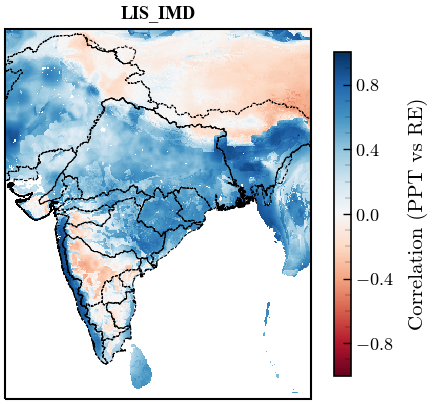

In [123]:
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(5,5*1.2),constrained_layout=False)
Map_plot1(A,fig,axs,model[mdl],"Correlation (PPT vs RE)")

plt.savefig(f"2_RE analysis/3_RE_P correlation/outputs/PPT vs RE {model[mdl]}.jpeg", bbox_inches='tight')
plt.show()

## 2_Seasonal analysis (P vs Q, P vs RE, Q vs RE)

C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache

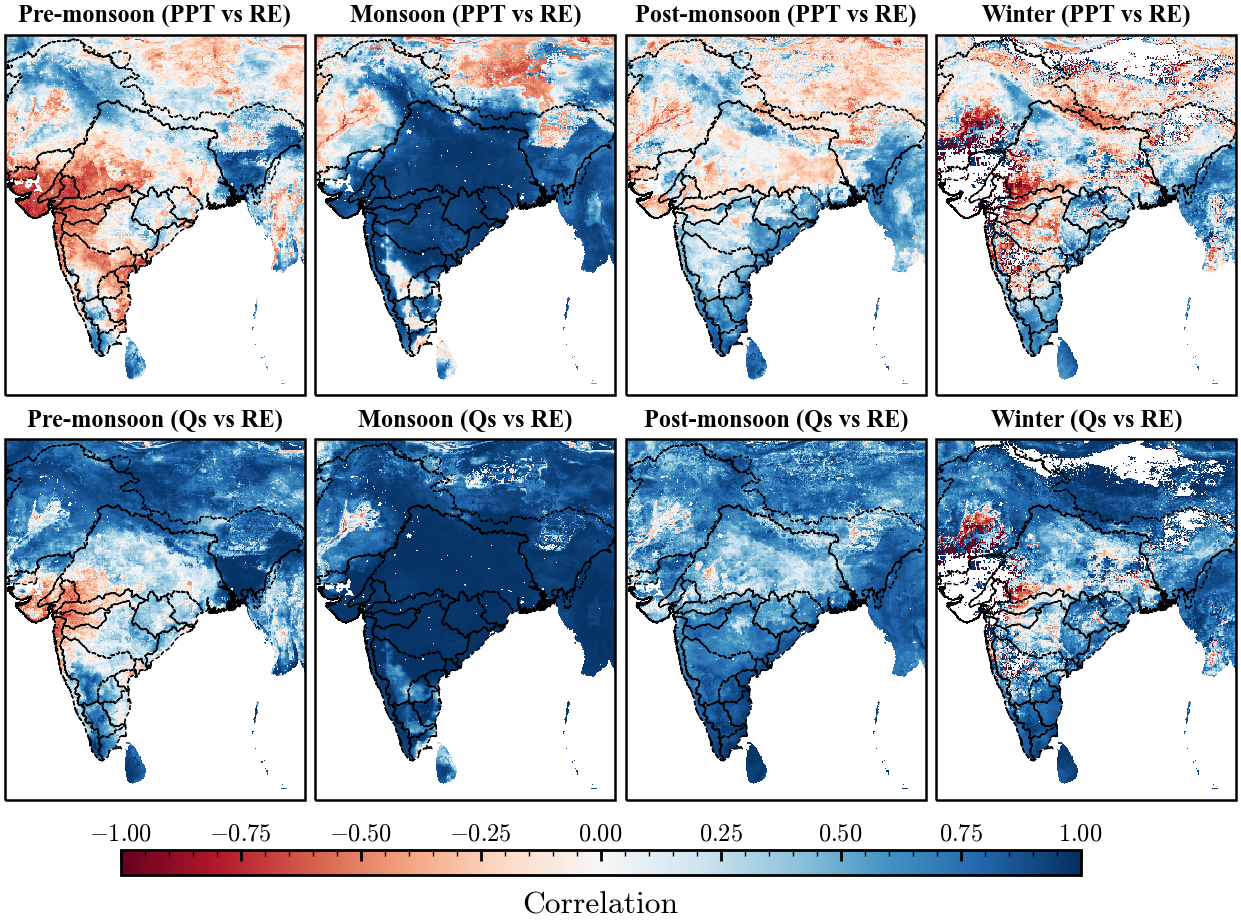

In [115]:
mdl=2


model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE']
var1=['P','ET','Q','RE']
ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
var_ssn = [[a, b] for a in var1 for b in ssn]

lsm_M = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

result1=[]
result2=[]
for ss in range(4):
    
    ds=lsm_M.isel(season=ss)
    
    xrr1=xr.corr(ds['TotalPrecip_tavg'], ds['RE'], dim='year')
    xrr2=xr.corr(ds['Qs_tavg'], ds['RE'], dim='year')
    result1.append(xrr1)
    result2.append(xrr2)
final=result1+result2
ssn1=np.repeat([ssn], 2, axis=0).flatten()
var2=np.repeat(['PPT vs RE','Qs vs RE'], 4, axis=0).flatten()

Map_plot2(final,[2,4],ssn1,'Correlation',var2)    
plt.savefig(f"2_RE analysis/3_RE_P correlation/outputs/cor_{model[mdl]}.jpeg", bbox_inches='tight')
plt.show()

## POst monsoon vs Monsoon

C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


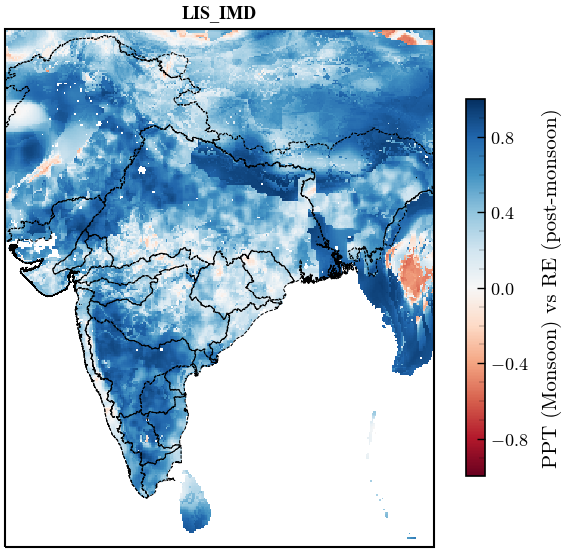

In [41]:
mdl=1
ss=1

ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]

lsm_M = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_ppt=lsm_M['TotalPrecip_tavg'].isel(season=ss)
lsm_qs=lsm_M['RE'].isel(season=ss+1)


fig, axs = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(7,7),constrained_layout=False)
A=xr.corr(lsm_ppt, lsm_qs, dim='year')
Map_plot1(A,fig,axs,model[mdl],"PPT (Monsoon) vs RE (post-monsoon)")
plt.savefig(f"2_RE analysis/3_RE_P correlation/outputs/ppt_m vs re_pm{model[mdl]}.jpeg", bbox_inches='tight')
plt.show()

# Functions

In [12]:
## Single map function
def Map_plot1(xrr1,fig,axs,plt_tit,cbar_tit):
    import numpy as np 
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import geopandas as gpd
    import matplotlib
    import xarray as xr
    from matplotlib.colors import LinearSegmentedColormap
    import matplotlib.colors as clr
    import matplotlib.ticker as ticker
    import scienceplots
    
    plt.style.use(['science','no-latex','bright'])
    vmin1=-1
    vmax1=1
    cmap1='RdBu'
    
# Step 3 : Figure axis confiureations   
    fig.subplots_adjust(bottom=None, left=None, top=None, right=None, wspace=0.13, hspace=0.13) 
    [x.set_linewidth(1.5) for x in axs.spines.values()]
    axs.set_extent([67.90, 97,5, 37.50], ccrs.PlateCarree())

# Step 5 : Plotting the data
    basin_map = gpd.read_file('DATA_p/Shapefiles/Indian_basin/India_transboundary.shp')
    #ind_map = gpd.read_file('DATA/Shapefiles/Indian_map/India_country.shp')
    Main_plot=xrr1.plot(vmin=vmin1,vmax=vmax1,ax=axs,cmap=cmap1,add_labels=False,add_colorbar=False) 
    basin_map.plot(ax=axs,color = 'none',edgecolor = 'Black',linewidth=.7,linestyle='--')
    axs.set_title(plt_tit,fontsize=13,pad=8,fontname='Times New Roman',weight='bold')
    
# Step 4: Colourbar settings   
    
    #cbar_ax = fig.add_axes([lf+wd*0.51, bt + 0.026, wd-wd*0.6, 0.005])
    cbar=plt.colorbar(Main_plot, orientation="vertical",shrink=0.7, pad=.06, aspect=20, label = cbar_tit) #,label = cbar_tit
    cbar.outline.set_linewidth(1.2) 
    cbar.ax.tick_params(axis='both',which='both', labelsize=10,width=1, length=6) 
    cbar.ax.tick_params(axis='both',which='minor', labelsize=10,width=0.2, length=4)
    cbar.ax.tick_params(axis='both', labelsize=13) 

    cbar.ax.yaxis.labelpad = 10
    cbar.ax.yaxis.label.set_fontsize(15)
    cbar.ax.yaxis.label.set_fontweight('bold')
    #axes.set_title(plt_tit,fontsize=18,pad=15,fontname='Times New Roman',weight='bold')

    cbar.locator = ticker.MaxNLocator(nbins=5)  # You can adjust the number of bins as needed
    cbar.update_ticks()


In [30]:
def Map_plot2(xrr1,col_row,plt_tit,cbar_tit,var2):
    import scienceplots
    plt.style.use(['science','no-latex','bright'])
    # Define the parameters
    B=5      # THis is the base scale. one figure dimension. All are determined based on this
    
    fig_len=col_row[1]*4
    fig_hg=col_row[0]*4*1.3   #This 1.15 depend on the subplot dimension. This case, height of subplot more than length
    fnt = B*3.5
    pd = B*1.8
    ln_wd = B*0.2
    
    fig, axs = plt.subplots(col_row[0],col_row[1],subplot_kw={'projection': ccrs.PlateCarree()},figsize=(fig_len,fig_hg),constrained_layout=False)
    axs=axs.flatten()

    #Adding feature maps
    basin_map = gpd.read_file('DATA_p/Shapefiles/Indian_basin/India_transboundary.shp')
    ind_map = gpd.read_file('DATA_p/Shapefiles/Indian_map/India_country.shp')

    #define plot variables
    vmin1 = -1
    vmax1 = 1
    cmap2='RdBu'

    #Loop over all of the models
    for i,model in enumerate(range(len(xrr1))):

            # Axis setttings
            data=xrr1[i].compute()
            axs[i].set_extent([67.90, 97.59,4.5, 37.50], ccrs.PlateCarree())
            [x.set_linewidth(1.8) for x in axs[i].spines.values()]        #bOUNDARY WIDTHH 



            axs[i].set_title(f"{plt_tit[i]} ({var2[i]})",fontsize=fnt,pad=pd,fontname='Times New Roman',weight='bold')

    
            # Adding Mainplo
            Main_plot=data.plot(vmin=vmin1,vmax=vmax1 ,ax=axs[i], cmap=cmap2, add_labels=False, add_colorbar=False) 
            basin_map.plot(ax=axs[i],color = 'none',edgecolor = 'black',linewidth=ln_wd,linestyle='--')



    # Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=1.5/fig_hg, left=None, top=None, right=None, wspace=0.1/(fig_len), hspace=1.25/fig_hg)  # First lock bottom, while make others None (automatically select), Then change spaces

    # Add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.2, 0.75/fig_hg, 0.6, 0.25/fig_hg])   # left,bottom, widht, height

    # Draw the colorbar
    cbar=fig.colorbar(Main_plot, cax=cbar_ax,orientation='horizontal') #,ticks=[0, 1,5]
    cbar.outline.set_linewidth(2) 
    cbar.ax.tick_params(axis='both',which='both', labelsize=fnt,width=2, length=8) 
    cbar.ax.tick_params(axis='both',which='minor', labelsize=fnt*0.7,width=1, length=4) 
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')

    cbar.set_label(cbar_tit, fontsize=fnt*1.3, labelpad=-65,weight="bold")#position=(0.5, -0.5)
    cbar.ax.xaxis.label.set_fontweight('bold')
    
    #plt.tight_layout()  
    #plt.show()